# PROJECT TITLE: Salary estimation using K-Nearest Neighbour

## About the Project
In this project, I worked with a real-world dataset containing 32,561 entries collected from Okomu Oil Palm Company in Benin City, Nigeria. The dataset includes five key features: age, education level, capital gain, hours worked per week, and income level. The goal of this project is to leverage the K-Nearest Neighbour (KNN) algorithm to predict an individual’s income level based on their demographic and financial profile.
## Goal:
To determine the relationship between an individual's age, education, capital gain, hours worked per week, and their income, and to estimate income levels using the K-Nearest Neighbour regression algorithm.
## Dataset Details:
* Age: Represents the individual's age in years.
* Education.num: Numerical representation of the individual’s education level.
* Capital.gain: The financial gain from capital investments.
* Hours.per.week: Number of hours worked per week.
* Income: The target variable, representing the individual’s income level.
## Methodologies:
* Data Preparation: The dataset was organized and formatted to ensure it was ready for analysis and modeling.
* Data Cleaning and Preprocessing: Missing values were handled, and outliers were identified and treated appropriately.
* Feature scaling was applied to numeric columns for optimal KNN performance.
* Exploratory Data Analysis (EDA): Visualizations, including scatter plots and histograms, were created to explore the relationships between the features and income. Insights were gained into the distribution and trends of key variables.
* Modeling: The K-Nearest Neighbour regression algorithm was applied to estimate income levels based on the provided features.
* Hyperparameter tuning was conducted to optimize the number of neighbors (k) for the best predictive performance.
## Evaluation:
* The model's performance was assessed using confusion matrix to evaluate prediction accuracy.
## Skills Developed:
* I gained proficiency in using Python libraries for Analysis and Visualization.
* I gained hands-on experience in applying the K-Nearest Neighbour algorithm for regression tasks.
* I acquired a deeper understanding of the importance of feature preprocessing and scaling in machine learning models.
* I Learned to evaluate regression models using statistical performance metrics to assess predictive accuracy

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [30]:
data=r"C:\Users\UDOH\Desktop\ALL PANTECH\4_SalaryEstimator_K-NearestNeighbour\4_SalaryEstimator_K-NearestNeighbour\salary.csv"

In [31]:
df = pd.read_csv(data)

In [32]:
df.head()

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,<=50K
1,82,9,0,18,<=50K
2,66,10,0,40,<=50K
3,54,4,0,40,<=50K
4,41,10,0,40,<=50K


In [33]:
df.shape

(32561, 5)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   education.num   32561 non-null  int64 
 2   capital.gain    32561 non-null  int64 
 3   hours.per.week  32561 non-null  int64 
 4   income          32561 non-null  object
dtypes: int64(4), object(1)
memory usage: 1.2+ MB


In [35]:
# MAPPING SALARY DATA TO BINARY VALUE
df['income'].replace({'<=50K': 0, '>50K': 1}, inplace=True)

df.head(20)

,age,education.num,capital.gain,hours.per.week,income
0,90,9,0,40,0
1,82,9,0,18,0
2,66,10,0,40,0
3,54,4,0,40,0
4,41,10,0,40,0
5,34,9,0,45,0
6,38,6,0,40,0
7,74,16,0,20,1
8,68,9,0,40,0
9,41,10,0,60,1


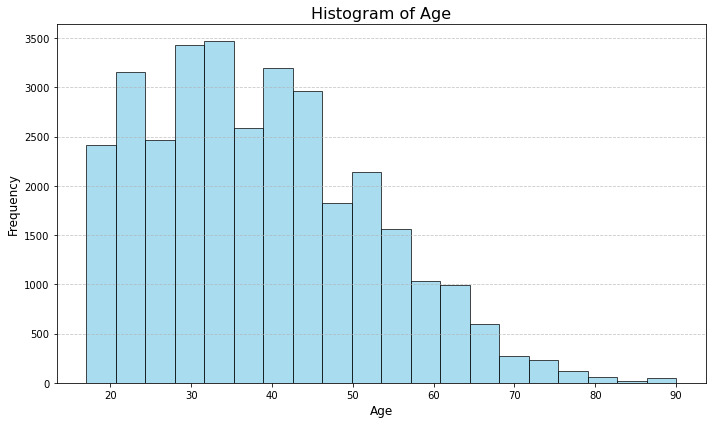

In [36]:
# Plot histogram for 'age'
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Age', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

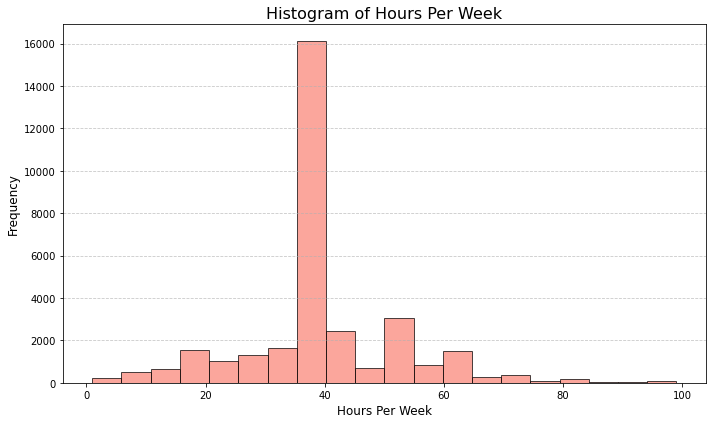

In [37]:
# Plot histogram for 'hours.per.week'
plt.figure(figsize=(10, 6))
plt.hist(df['hours.per.week'], bins=20, color='salmon', edgecolor='black', alpha=0.7)
plt.title('Histogram of Hours Per Week', fontsize=16)
plt.xlabel('Hours Per Week', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

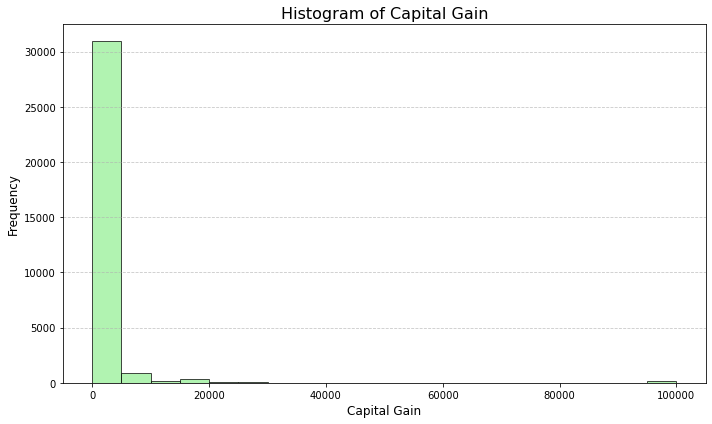

In [38]:
# Plot histogram for 'capital.gain'
plt.figure(figsize=(10, 6))
plt.hist(df['capital.gain'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.title('Histogram of Capital Gain', fontsize=16)
plt.xlabel('Capital Gain', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

C:\Users\UDOH\New folder\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


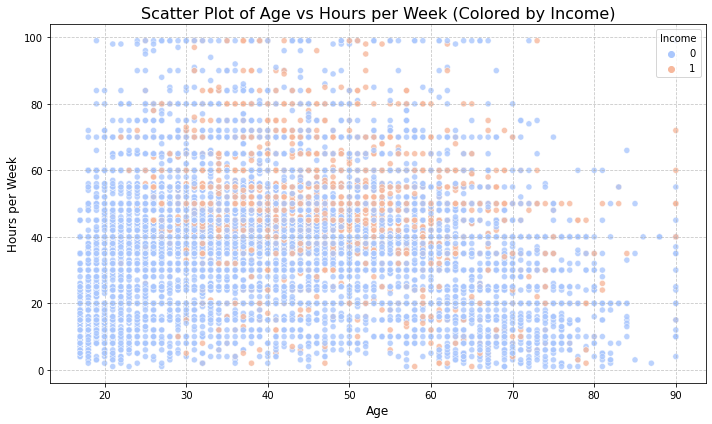

In [39]:
# Scatter plot: Age vs. Hours per Week, colored by Income
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='age',
    y='hours.per.week',
    hue='income',
    palette='coolwarm',
    alpha=0.8
)
plt.title('Scatter Plot of Age vs Hours per Week (Colored by Income)', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Hours per Week', fontsize=12)
plt.legend(title='Income')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show();

### SEGREGATE DATASET INTO X AND Y

In [40]:
# Drop the target variable 'income' from the features
x = df.iloc[:, :-1]
x                                       

,age,education.num,capital.gain,hours.per.week
0,90,9,0,40
1,82,9,0,18
2,66,10,0,40
3,54,4,0,40
4,41,10,0,40
...,...,...,...,...
32556,22,10,0,40
32557,27,12,0,38
32558,40,9,0,40
32559,58,9,0,40


In [41]:
Y = df.iloc[:, -1]
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    0
32558    1
32559    0
32560    0
Name: income, Length: 32561, dtype: int64

In [ ]:
#SPLITING DATASET INTO TRAIN AND TEST
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.25, random_state = 0)

In [43]:
#Feature scaling 
# We scale our data to make all the features contribute equally to the result
#Fit_Transform-Fit method is calculating the mean and variance of each of the features present in our data
#Transform - Transform method is transforming all the features using respective  mean and variance
#We want our test data to be completely new and a surprise set for our model

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#Finding the best k-Value

error =[]
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

# calculating error for k values btw 1 and 40

for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train, Y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != Y_test))

Text(0, 0.5, 'Mean Error')

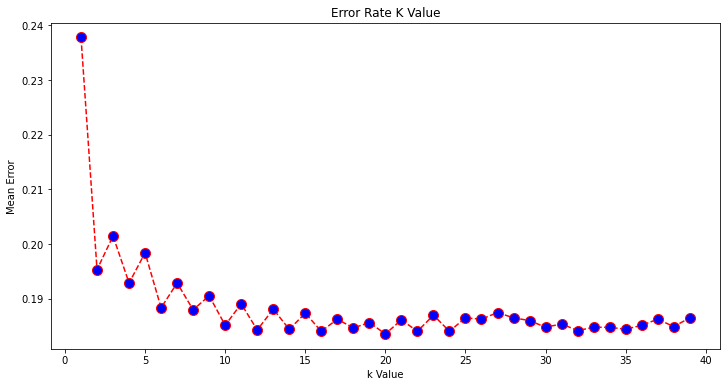

In [45]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
        markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('k Value')
plt.ylabel('Mean Error')

In [49]:
#Training the model
model = KNeighborsClassifier(n_neighbors = 16, metric = 'minkowski', p=2)  #p=2 means Euclidean Distance formular. check the mindmap. 
model.fit(x_train, Y_train)

KNeighborsClassifier(n_neighbors=16)

In [51]:
age = int(input("Enter New Employee's Age: "))
edu = int(input("Enter New Employee's Education: "))
cg = int(input("Enter New Employee's Capital Gain: "))
wh = int(input("Enter New Employee's Hour's Per Week: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)
                       
if result == 1:
    print("Employee might get salary above 50k")
else:
    print("Employee might not get Salary above 50k ")

Enter New Employee's Age: 56
Enter New Employee's Education: 6
Enter New Employee's Capital Gain: 30000
Enter New Employee's Hour's Per Week: 6
[1]
Employee might get salary above 50k


C:\Users\UDOH\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


### Prediction for all Test Data

In [53]:
Y_pred = model.predict(x_test)
print(np.concatenate((Y_pred.reshape(-1,1), Y_test.values.reshape(-1,1)), axis=1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Evaluating Model - CONFUSION MATRIX

In [57]:
cm = confusion_matrix(Y_test, Y_pred)
print("confusion Matrix: ")
print(cm)

print("Accuracy of the Model: {0}%".format(accuracy_score(Y_test, Y_pred)*100))

confusion Matrix: 
[[5883  310]
 [1188  760]]
Accuracy of the Model: 81.59931212381771%


## Conclusion

* The project provided valuable insights into the factors influencing income levels of employees at Okomu Oil Palm Company in Benin City, Nigeria. By analyzing features such as age, education level, capital gain, and hours worked per week, this project successfully demonstrated the predictive power of the KNN algorithm in regression tasks.